In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("VideoGamesSales.csv")

In [3]:
#check for and remove duplicate rows
#df=df[df.duplicated]
df = df.drop_duplicates()

#Replace null values in Publisher and Region
df["Publisher"] = df["Publisher"].fillna("Unknown")
df["Region"] = df["Region"].fillna("Unknown")

#fix NA_sales type
df.columns = df.columns.str.strip()  # removes hidden spaces just in case
sales_col = "NA_Sales" if "NA_Sales" in df.columns else "National Sales"

df[sales_col] = df[sales_col].replace(r"[$,]", "", regex=True)
df[sales_col] = pd.to_numeric(df[sales_col], errors="coerce")
Average_Sales = df[sales_col].mean()

#Catagorize United States column correctly
df['Country']=df['Country'].replace({'USA': 'United States'})
df['Country']=df['Country'].str.title()

#rename columns in clean format
df=df.rename(columns={'NA_Sales':'National Sales', 'Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})

df.head(10)


,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411
5,6,Tetris,GB,2010,Jun,Puzzle,Nintendo,United States,Newark,Ohio,East,23.20,30.26,6.960,9.078
6,7,New Super Mario Bros.,DS,2010,Jul,Platform,Nintendo,United States,Fremont,Nebraska,Central,11.38,30.01,3.414,9.003
7,8,Wii Play,Wii,2010,Aug,Misc,Nintendo,United States,Odessa,Texas,Central,14.03,29.02,4.209,8.706
8,9,New Super Mario Bros. Wii,Wii,2010,Sep,Platform,Nintendo,United States,Fairfield,Ohio,East,14.59,28.62,4.377,8.586
13,10,Duck Hunt,NES,2010,Oct,Shooter,Nintendo,United States,Dallas,Texas,Unknown,26.93,28.31,8.079,8.493


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5893 entries, 0 to 5908
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             5893 non-null   int64  
 1   Name             5893 non-null   object 
 2   Platform         5893 non-null   object 
 3   Year             5893 non-null   int64  
 4   Month            5893 non-null   object 
 5   Genre            5893 non-null   object 
 6   Publisher        5893 non-null   object 
 7   Country          5893 non-null   object 
 8   City             5893 non-null   object 
 9   State            5893 non-null   object 
 10  Region           5893 non-null   object 
 11  National Sales   5893 non-null   float64
 12  Global Sales     5893 non-null   float64
 13  National Profit  5893 non-null   float64
 14  Global Profit    5893 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage: 736.6+ KB


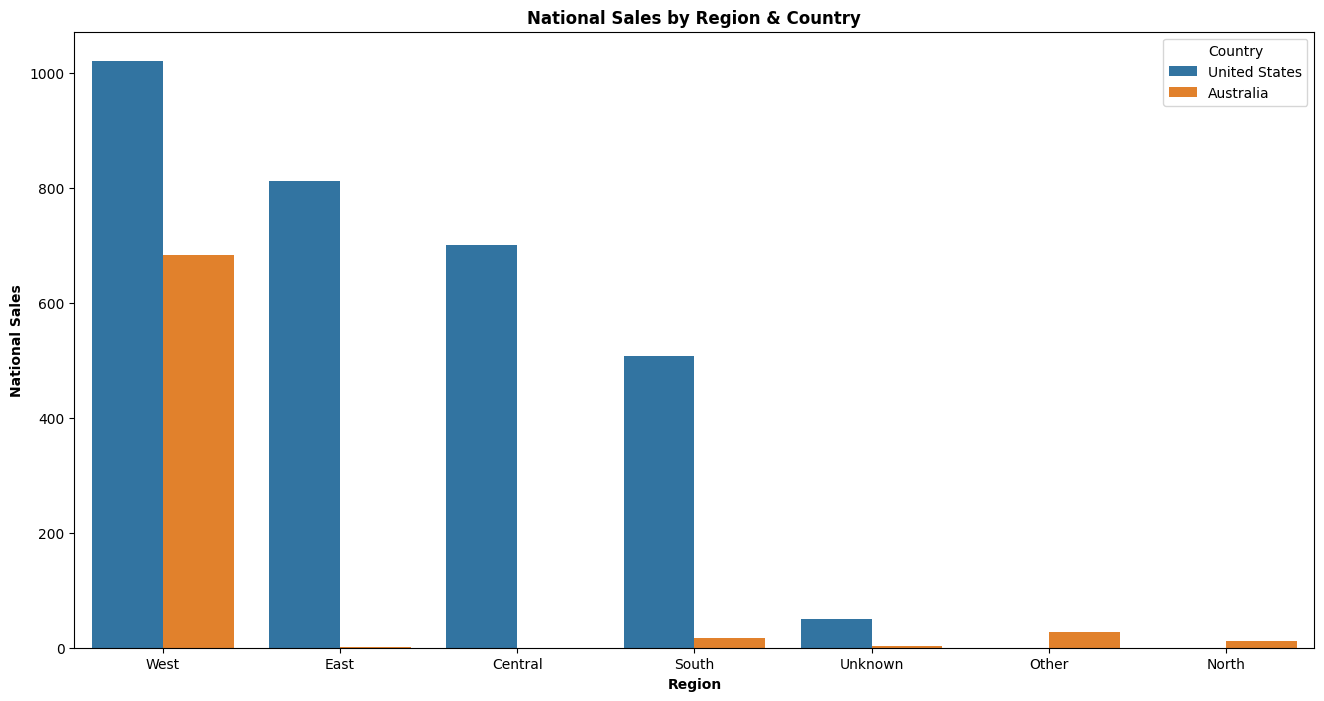

In [5]:
#create Bar chart with region and country national sales
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by = 'National Sales',ascending=False)
National_Sales

plt.figure(figsize=(16,8))
sns.barplot(data=National_Sales, x = 'Region', y = 'National Sales', hue = 'Country')
plt.title('National Sales by Region & Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

This chart compares the total national sales across regions for the United States VS Australia. The United States dominates overall with the largest total sales mainly based in the West and the East and smaller total sales in Centeral and South region. Australias overall contribution to sales is signifigantly less than the United States in every region, with the Western region making up most of its sales. The Unknown/Other category suggests that some rows had inconsistent labeling or missing data, but they represent a relativly smaller portion of sales.

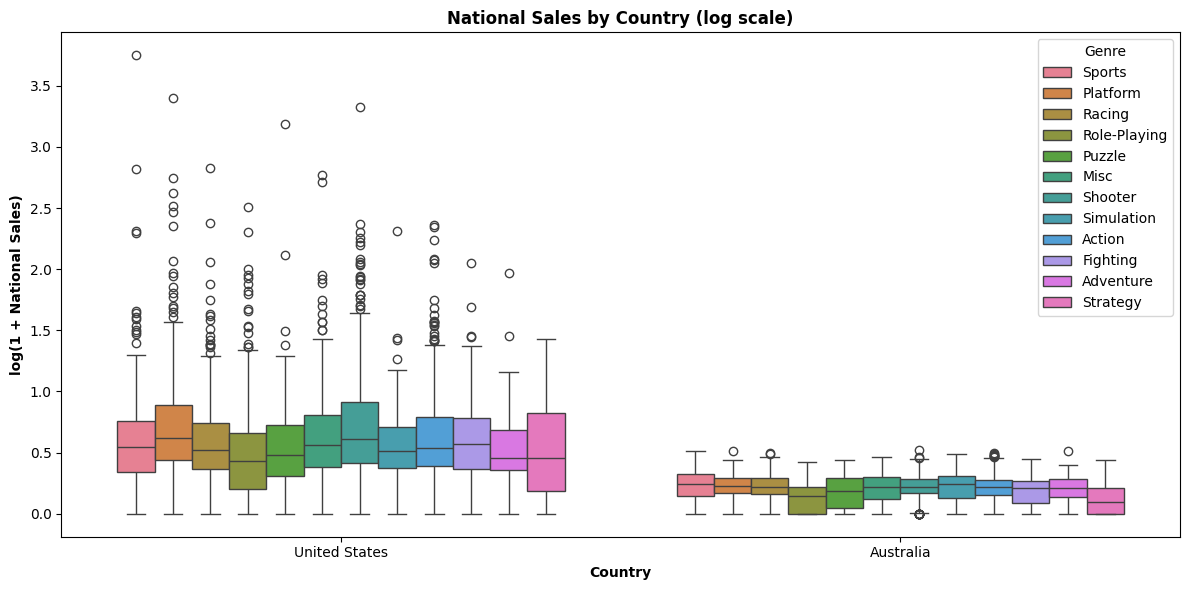

In [6]:
#Boxplot of sales by country and game Genre
df_plot = df.copy()
df_plot["National Sales log1p"] = np.log1p(df_plot["National Sales"])

plt.figure(figsize=(12,6))
sns.boxplot(x="Country", y="National Sales log1p", data=df_plot, hue="Genre")
plt.title("National Sales by Country (log scale)", fontweight="bold")
plt.xlabel("Country", fontweight="bold")
plt.ylabel("log(1 + National Sales)", fontweight="bold")
plt.tight_layout()
plt.show()


This plot shows the distribution of sales by genre in each country, and uses log scale so both the typical games and the outliers are clearly visible. In the United States most genres have higher medians, meaning sales are genreally larger and more variable, with more games that sold far more than the average. In Australia the boxes are lower and tighter showing smaller typical sales and a few extreme hits. Overall the market for the United States is more "hit driven" while Australia sales are lower and more consistent across all genres.

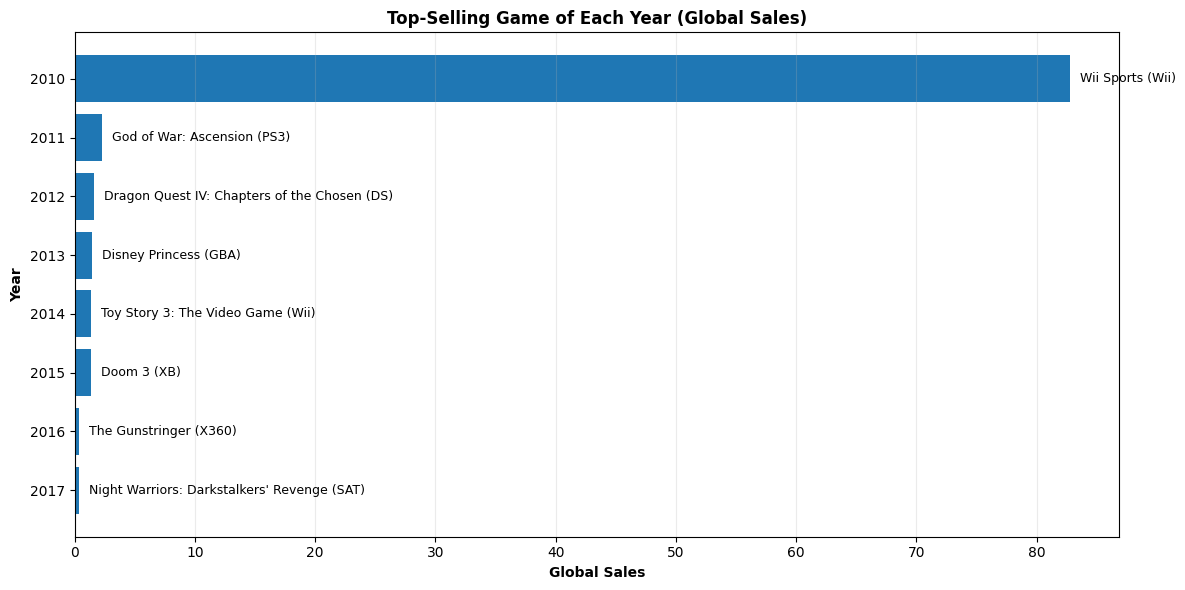

In [7]:
# Ensure correct dtypes
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)

# Pick the top-selling game each year
best_by_year = (
    df.loc[df.groupby("Year")["Global Sales"].idxmax()]
      .sort_values("Year")
      .reset_index(drop=True)
)

best_by_year[["Year", "Name", "Platform", "Global Sales"]]

import matplotlib.pyplot as plt

best_by_year["Label"] = best_by_year["Name"] + " (" + best_by_year["Platform"].astype(str) + ")"

fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(best_by_year["Year"].astype(str), best_by_year["Global Sales"])

ax.set_title("Top-Selling Game of Each Year (Global Sales)", fontweight="bold")
ax.set_xlabel("Global Sales", fontweight="bold")
ax.set_ylabel("Year", fontweight="bold")

# Put the game names on the bars
max_sales = best_by_year["Global Sales"].max()
for _, r in best_by_year.iterrows():
    ax.text(
        r["Global Sales"] + max_sales * 0.01,   # small offset
        str(r["Year"]),
        r["Label"],
        va="center",
        fontsize=9
    )


ax.invert_yaxis()

ax.grid(True, axis="x", alpha=0.25)
plt.tight_layout()
plt.show()



This chart highlights the single best-selling game in each year and the total sales it achieved. It shows that the top game changes from year to year, but a few years stand out with much higher sales than the rest, meaning those years were driven by major “blockbuster” titles. Overall, the pattern suggests the market is hit-driven: most years have a clear winner, but only some years produce games that significantly outperform typical annual leaders.